# Principle Component Analysis

In this notebook, we briefly introduce the concept of Principle component Aanalysis, then apply it on the CVDs data set.

---

## Introduction

[Principle Component Analysis]() is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. 

The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i$-th principal component can be taken as a direction orthogonal to the first $i-1$ principal components that maximizes the variance of the projected data.

It can be shown that the principal components are eigenvectors of the data's covariance matrix. Thus, the principal components are often computed by eigendecomposition of the data covariance matrix or singular value decomposition of the data matrix.

---

## Algorithm

The goal of PCA is to reduce the dimensionality of the feature vectors used in training machine learning algorithms. The steps in PCA are:

1. **Stadardize (center and scale) the data.** 
2. **Compute the covariance or correlation matrix.**
3. **Find the eigenvalues and the orthonormal eigenvectors of correlation matrix.**
4. **Find the principal components.**
5. **Reduce the dimension of the data.**

---

## Coding 
As usual, we import the required libraries and the main data set.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

In [2]:
# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart.csv")

# Data Preprocessing by onehot encoding
df.Sex = df.Sex.replace({'M':1, 'F':0})
df.ExerciseAngina = df.ExerciseAngina.replace({'Y':1, 'N':0})

ChestPainType = pd.get_dummies(df.ChestPainType,drop_first=True)
RestingECG = pd.get_dummies(df.RestingECG,drop_first=True)
ST_Slope = pd.get_dummies(df.ST_Slope,drop_first=True)
df = pd.concat([df,ChestPainType, RestingECG, ST_Slope],axis=1)
df.drop(['ChestPainType', 'RestingECG', 'ST_Slope'],axis=1,inplace=True)

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


In [3]:
X = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

We first standardize the response variable through minus its mean and divide the standard deviation. Then we get the matrix $A$.

In [4]:
me = np.mean(X)
se = np.std(X, ddof=1)
A = (X - me)/se
A = A.to_numpy()

Then we can compute the convariance or correlation matrix by $S = A^{\top}A/(n-1)$.

In [5]:
n = np.shape(A)[0]
S = np.dot(A.T,A)/(n-1)
print(f"np.shape(S) = {np.shape(S)}")

np.shape(S) = (15, 15)


This matrix is symmetric and its columns are of the same size as the columns of $A$. Next we find the eigenvalues and eigenvectors of correlation matrix $S$.

In [6]:
## eigenvalues and eigenvectors of S
w, v = np.linalg.eig(S)

Note that the eigenvectors of $S$ are columns of the matrix $V$ in the singular value decomposition of $A$. We will check this fact in the cells below.

In [7]:
## SVD of A
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (918, 15)
np.shape(sigma) = (15,)
np.shape(Vt) = (15, 15) 



In [8]:
## the first eigenvector of S 
print(f'First eigenvector of S:\n {v[:,0]}\n')
## the first column of V
print(f'First column of V:\n {Vt.T[:,0]}')

First eigenvector of S:
 [-0.28606208 -0.16820501 -0.14506097  0.11949747 -0.16366861  0.33810775
 -0.36109185 -0.31043494  0.29163928  0.06959815  0.00410618  0.14261869
 -0.14851183 -0.39628443  0.44423006]

First column of V:
 [ 0.28606208  0.16820501  0.14506097 -0.11949747  0.16366861 -0.33810775
  0.36109185  0.31043494 -0.29163928 -0.06959815 -0.00410618 -0.14261869
  0.14851183  0.39628443 -0.44423006]


In [9]:
## the second eigenvector of S 
print(f'Second eigenvector of S:\n {v[:,1]}\n')
## the second column of V
print(f'Second column of V:\n {Vt.T[:,1]}')

Second eigenvector of S:
 [ 0.20969044 -0.01687076  0.15514278 -0.09289606  0.18993464  0.01493189
 -0.12718063 -0.0851646   0.0458272   0.01068263  0.08873049 -0.60563286
  0.60448719 -0.25599625  0.23559061]

Second column of V:
 [-0.20969044  0.01687076 -0.15514278  0.09289606 -0.18993464 -0.01493189
  0.12718063  0.0851646  -0.0458272  -0.01068263 -0.08873049  0.60563286
 -0.60448719  0.25599625 -0.23559061]


We can see that the eigenvectors of $S$ are equivalent to the columns of $V$, except that the sign is different.

Next, we know that the columns of $V$ are the principle components. We will project the data contained in $A$ onto the first two principle component axis.

In [10]:
W2 = Vt.T[:,:2]
X2D = A.dot(W2)

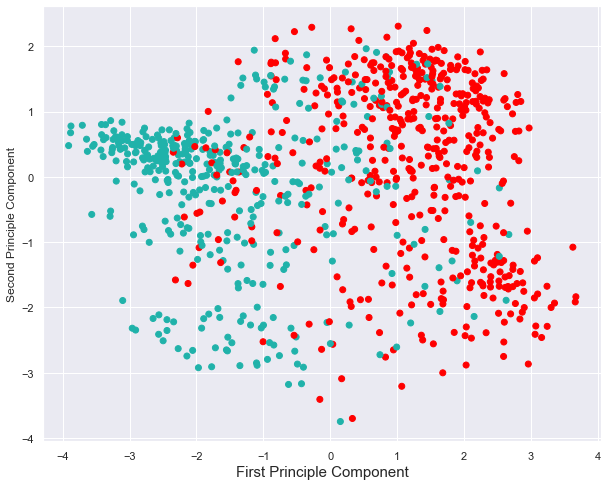

In [11]:
def colors(y):
    if y == 1:
        return "red"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

We can observe that data points with different labels overlap with each other. Therefore, we cannot separate the data by using only the first two PCs.

We will use ```preprocess``` function and ```PCA``` class from Scikit-Learn to standardize the data and perform PCA.

In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}\n")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.22586656 0.11008684 0.0946602  0.08202286 0.07477575 0.0709148
 0.06266947 0.05485375 0.05125547 0.044232   0.04085286 0.03082035
 0.02842801 0.02153163 0.00702946]

per_var = [22.59 11.01  9.47  8.2   7.48  7.09  6.27  5.49  5.13  4.42  4.09  3.08
  2.84  2.15  0.7 ] 



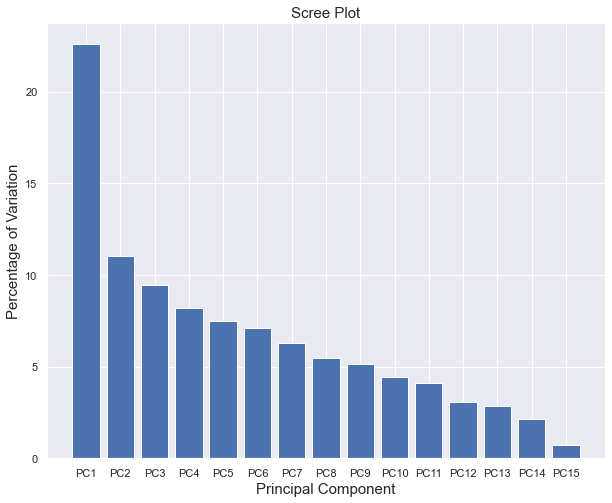

In [13]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,16)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 16), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

We call function ```pca.components_``` to see how each PC is obtained as a linear combination of the original coordinates.

In [14]:
pca.components_[:,0]

array([-0.28606208,  0.20969044, -0.03435487,  0.05426239,  0.1678863 ,
       -0.46996303,  0.09613801,  0.28480552,  0.20995953, -0.48329963,
        0.21759314,  0.36120443,  0.06616661, -0.26550926, -0.01777174])

The first PC have the linear relationship: 
$$
PC1 = -0.28606208 * Age + 0.20969044 * Sex -0.03435487 * RestingBP + \cdots.
$$

We use ```pca.transform``` to see how our data looks like in the new coordinate system.

In [15]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,3.140236,-0.423503,-0.645638,-1.351586,-0.148608,-0.066137,-0.583312,-0.982055,-0.909093,-0.083350,0.289381,-0.044781,0.297832,-0.075079,0.060554
1,0.232366,-1.090159,-0.778346,2.329481,0.088440,-0.653875,1.581582,-0.366193,-0.946921,1.400129,0.971671,-0.251376,-0.065595,-0.204622,0.089115
2,1.652938,2.153511,-0.304968,-1.835409,-1.613212,0.729551,-0.365954,0.559816,-1.154151,-0.127273,-0.544972,-1.965612,0.480221,0.654580,0.006851
3,-1.214582,-1.678768,-1.081753,-0.075516,-0.493002,-0.201606,1.170093,0.775724,0.461723,1.492761,-0.687215,-0.384623,-0.065714,0.160616,-0.085255
4,1.291898,-0.069173,0.943492,1.407632,0.048144,-1.728051,-0.928860,0.531490,-1.070896,0.050526,-0.048516,-0.620396,0.098401,0.049619,-0.015720


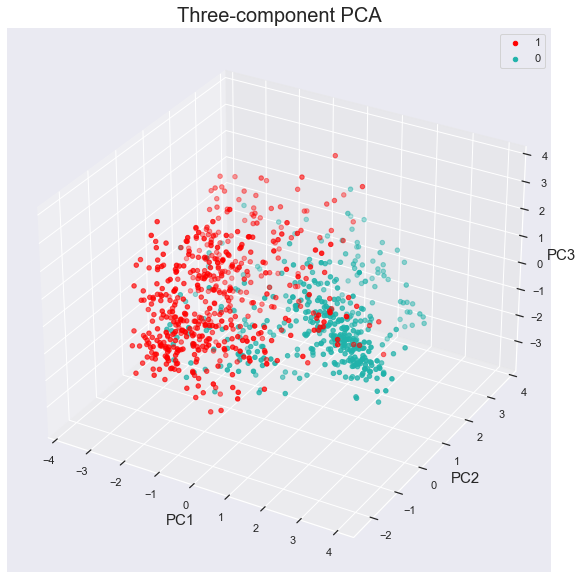

In [28]:
from mpl_toolkits.mplot3d import Axes3D
## We add to the previous table the labels
projected_df = pd.concat([pca_df, y], axis = 1)

targets = [1,0]
colors = ["red", "lightseagreen"]

plt.figure(figsize = (15, 10))
ax = plt.subplot(111, projection = '3d')

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df.HeartDisease == target]
    ax.scatter(temp_df["PC1"], temp_df["PC2"], temp_df['PC3'],
                c = color)

ax.set_xlabel('PC1', size = 15)
ax.set_ylabel('PC2', size = 15)
ax.set_zlabel('PC3', size = 15)
plt.title('Three-component PCA', size = 20)
plt.legend(targets)
plt.show()